In [1]:
import pandas as pd
from sklearn import tree

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace = True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
df.shape

(891, 5)

In [6]:
X = df.drop('Survived', axis = 'columns')
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [7]:
y = df.Survived

In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [10]:
X.Age = X.Age.fillna(X.Age.mean())
X

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [11]:
dummies = pd.get_dummies(X.Sex)
dummies

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [12]:
X = pd.concat([X, dummies], axis = 'columns')
X

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.000000,7.2500,False,True
1,1,female,38.000000,71.2833,True,False
2,3,female,26.000000,7.9250,True,False
3,1,female,35.000000,53.1000,True,False
4,3,male,35.000000,8.0500,False,True
...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,False,True
887,1,female,19.000000,30.0000,True,False
888,3,female,29.699118,23.4500,True,False
889,1,male,26.000000,30.0000,False,True


In [13]:
X = X.drop('Sex', axis = 'columns')
X

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
...,...,...,...,...,...
886,2,27.000000,13.0000,False,True
887,1,19.000000,30.0000,True,False
888,3,29.699118,23.4500,True,False
889,1,26.000000,30.0000,False,True


In [14]:
X = X.drop('male', axis = 'columns')
X

,Pclass,Age,Fare,female
0,3,22.000000,7.2500,False
1,1,38.000000,71.2833,True
2,3,26.000000,7.9250,True
3,1,35.000000,53.1000,True
4,3,35.000000,8.0500,False
...,...,...,...,...
886,2,27.000000,13.0000,False
887,1,19.000000,30.0000,True
888,3,29.699118,23.4500,True
889,1,26.000000,30.0000,False


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
len(X_train)

712

In [18]:
from sklearn import tree

In [19]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
predictions = model.predict(X_test)

In [21]:
model.score(X_test, y_test)

0.770949720670391

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_test, predictions)
cm

array([[86, 21],
       [20, 52]])

In [24]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Text(20.72222222222222, 0.5, 'True')

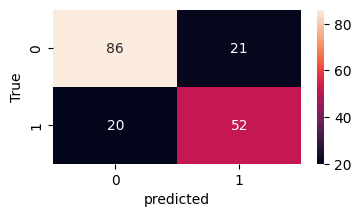

In [25]:
plt.figure(figsize = (4,2))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('True')